In [1]:
#Cargamos librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd

df=pd.read_csv("datoslimpioscreta.csv")

In [3]:
df.columns

Index(['source', 'host_location', 'host_response_time', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'instant_bookable', 'has_availability',
       'host_is_superhost', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'availability_eoy', 'number_of_reviews_ly',
       'estimated_occupancy_l365d', 'estimated_revenue_l365d',
       'review_scores_ratin

In [4]:
df.select_dtypes(include=['number']).columns


Index(['host_is_superhost', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'availability_eoy', 'number_of_reviews_ly',
       'estimated_occupancy_l365d', 'estimated_revenue_l365d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calcu

1. HOST RESPONSE RATE

In [20]:
#CORRELACIÓN LINEAL
R2 = abs(df["host_response_rate"].corr(df["price"]))
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2)
R

np.float64(0.08170182158072507)

MODELO1 = FUNCIÓN POLINOMIAL INVERSA

C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\351411026.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\351411026.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*exp(-b*x)+c", color= "red")


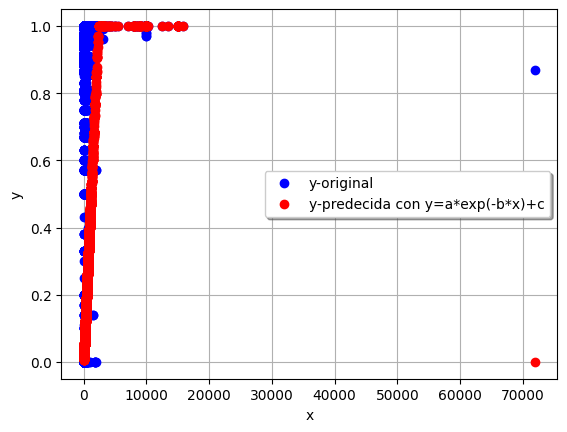

68.07859817908611
8.250975589534011


In [21]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['price']]
Var_Dep= df['host_response_rate']
x= Vars_Indep
y= Var_Dep
def func(x, a, b, c):
    return a/b*x**2 + c*x
parametros, covs = curve_fit(func, df['price'], df['host_response_rate'])
y_pred = func(x, *parametros)
y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*exp(-b*x)+c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_HOSTRESPONSERATE = abs(r2_score(y, y_pred))
R_HOSTRESPONSERATE = np.sqrt(R2_HOSTRESPONSERATE)
print(R2_HOSTRESPONSERATE)
print(R_HOSTRESPONSERATE)


MODELO2 = FUNCIÓN CUADRÁTICA

C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\3751848157.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\3751848157.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*exp(-b*x)+c", color= "red")


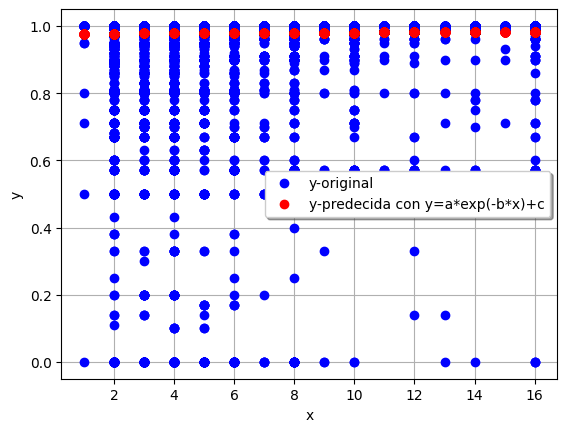

0.00011257869276604104
0.010610310681881141


In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['accommodates']]
Var_Dep= df['host_response_rate']
x= Vars_Indep
y= Var_Dep
def func(x, a, b, c):
    return a*x**2 + b*x + c
parametros, covs = curve_fit(func, df['accommodates'], df['host_response_rate'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*x**2 + b*x + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R21 = abs(r2_score(y, y_pred))
R1 = np.sqrt(R21)
print(R21)
print(R1)

In [34]:
import pandas as pd

resultados = pd.DataFrame({
    "Modelo": ["Host Response Rate: Lineal", "Host Response Rate: Función Polinomial Inversa", "Host Response Rate: Función Cuadrática",],
    "R2": [R2, R2_HOSTRESPONSERATE, R21],
    "Correlación (r)": [R, R_HOSTRESPONSERATE, R1]
})
resultados

,Modelo,R2,Correlación (r)
0,Host Response Rate: Lineal,0.010964,0.104711
1,Host Response Rate: Función Polinomial Inversa,68.078598,8.250976
2,Host Response Rate: Función Cuadrática,0.008551,0.092472


2. HOST ACCEPTANCE RATE

In [24]:
#CORRELACIÓN LINEAL
R2 = abs(df["beds"].corr(df["host_acceptance_rate"]))
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2)
R

np.float64(0.10471131262968306)

MODELO 1 =  FUNCIÓN INVERSA

C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\2691498646.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\2691498646.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=1/(a*x)", color= "red")


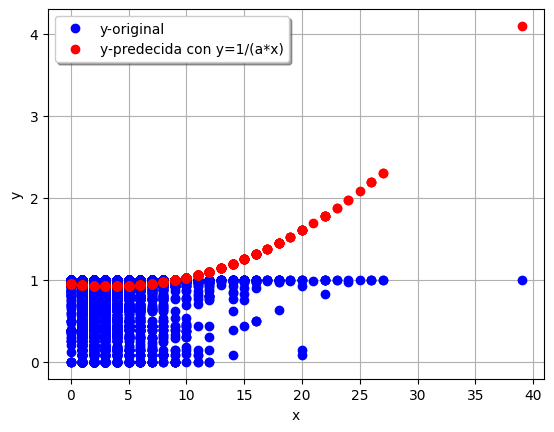

0.057796151618593194
0.24040830189199622


In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['beds']]
Var_Dep= df['host_acceptance_rate']
x= Vars_Indep
y= Var_Dep
def func(x, a):
    return 1/(a*x)
parametros, covs = curve_fit(func, df['bathrooms'], df['host_acceptance_rate'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=1/(a*x)", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R21 = abs(r2_score(y, y_pred))
R1 = np.sqrt(R21)
print(R21)
print(R1)


MODELO 2 = FUNCIÓN TANGENCIAL

C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\3972363659.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\3972363659.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*np.tan(x) + b", color= "red")


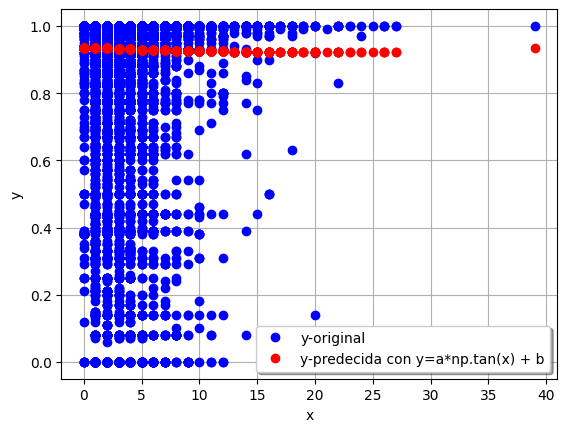

0.00012705699320381125
0.011271956050473727


In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['beds']]
Var_Dep= df['host_acceptance_rate']
x= Vars_Indep
y= Var_Dep
def func(x, a, b):
    return a*np.tan(x) + b
parametros, covs = curve_fit(func, df['beds'], df['host_acceptance_rate'])
y_pred = func(x, *parametros)
y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*np.tan(x) + b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_HOST_ACCEPTANCE_RATE = abs(r2_score(y, y_pred))
R_HOST_ACCEPTANCE_RATE = np.sqrt(R2_HOST_ACCEPTANCE_RATE)
print(R2_HOST_ACCEPTANCE_RATE)
print(R_HOST_ACCEPTANCE_RATE)

In [35]:
resultados = pd.DataFrame({
    "Modelo": ["Host Acceptance Rate: Lineal", "Host Acceptance Rate: Función Inversa", "Host Acceptance Rate: Función Tangencial",],
    "R2": [R2, R21, R2_HOST_ACCEPTANCE_RATE],
    "Correlación (r)": [R, R1, R_HOST_ACCEPTANCE_RATE]
})
resultados

,Modelo,R2,Correlación (r)
0,Host Acceptance Rate: Lineal,0.010964,0.104711
1,Host Acceptance Rate: Función Inversa,0.008551,0.092472
2,Host Acceptance Rate: Función Tangencial,0.000127,0.011272


3. HOST TOTAL LISTINGS COUNT

In [ ]:
#CORRELACIÓN LINEAL
R2 = abs(df["host_total_listings_count"].corr(df["bathrooms"]))
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2)
R

np.float64(0.039053665635532656)

MODELO 1 : FUNCIÓN INVERSA

C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\1413323802.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\1413323802.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*np.log(x) + b", color= "red")


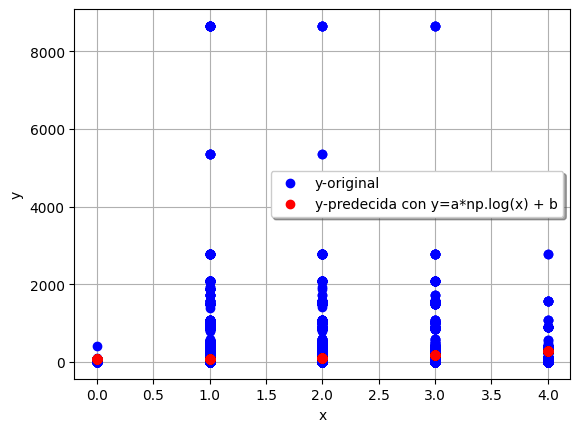

0.008551064597766556
0.09247196655076909


In [30]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['bathrooms']]
Var_Dep= df['host_total_listings_count']
x= Vars_Indep
y= Var_Dep
def func8(x, a, b):
    return a*np.log(x) + b
parametros, covs = curve_fit(func, df['bathrooms'], df['host_total_listings_count'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*np.log(x) + b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R21 = abs(r2_score(y, y_pred))
R1 = np.sqrt(R21)
print(R21)
print(R1)

MODELO 2 : POLINOMIO DE GRADO 4

C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\3621121136.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs = curve_fit(func, df['bathrooms'], df['host_total_listings_count'])
C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\3621121136.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\3621121136.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=1/a*x**4", color= "red")


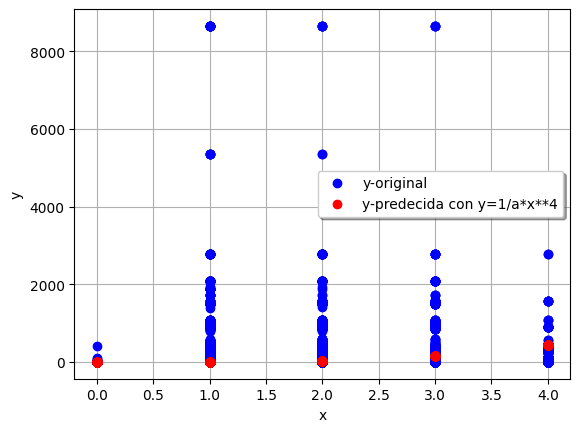

0.03207973834558664
0.17910817498256923


In [48]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['bathrooms']]
Var_Dep= df['host_total_listings_count']
x= Vars_Indep
y= Var_Dep
def func(x, a, b):
    return 1/a*x**4
parametros, covs = curve_fit(func, df['bathrooms'], df['host_total_listings_count'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=1/a*x**4", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_HOSTTOTALLISTINGCOUNT = abs(r2_score(y, y_pred))
R_HOSTTOTALLISTINGCOUNT = np.sqrt(R2_HOSTTOTALLISTINGCOUNT)
print(R2_HOSTTOTALLISTINGCOUNT)
print(R_HOSTTOTALLISTINGCOUNT)

In [33]:
resultados = pd.DataFrame({
    "Modelo": ["Host Total Listings Count: Lineal", "Host Total Listings Count: Función Inversa", "Host Total Listings Count: Polinomio de grado 4",],
    "R2": [R2, R21, R2_HOSTTOTALLISTINGCOUNT ],
    "Correlación (r)": [R, R1, R_HOSTTOTALLISTINGCOUNT ]
})
resultados

,Modelo,R2,Correlación (r)
0,Host Total Listings Count: Lineal,0.010964,0.104711
1,Host Total Listings Count: Función Inversa,0.008551,0.092472
2,Host Total Listings Count: Polinomio de grado 4,0.032080,0.179108


4. ACCOMODATES

In [36]:
#CORRELACIÓN LINEAL
R2 = abs(df["accommodates"].corr(df["review_scores_value"]))
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2)
R

np.float64(0.2090966346561749)

MODELO1 = FUNCIÓN CUADRÁTICA

C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\1135940015.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\1135940015.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*x**2 + b*x + c", color= "red")


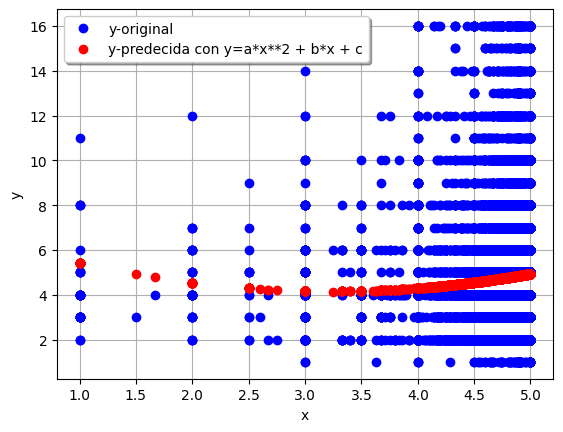

0.003368174817099945
0.05803597864342381


In [47]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['review_scores_value']]
Var_Dep= df['accommodates']
x= Vars_Indep
y= Var_Dep
def func(x, a, b, c):
    return a*x**2 + b*x + c
parametros, covs = curve_fit(func, df['review_scores_value'], df['accommodates'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*x**2 + b*x + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_ACCOMODATES = abs(r2_score(y, y_pred))
R_ACCOMODATES = np.sqrt(R2_ACCOMODATES)
print(R2_ACCOMODATES)
print(R_ACCOMODATES)

MODELO2 = FUNCIÓN TANGENCIAL

C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\3330771007.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\3330771007.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*np.tan(x) + b", color= "red")


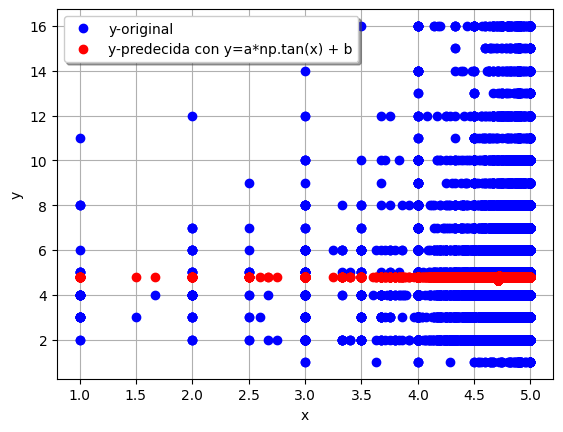

4.136576630664468e-05
0.006431622369717044


In [54]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['review_scores_value']]
Var_Dep= df['accommodates']
x= Vars_Indep
y= Var_Dep
def func(x, a, b):
    return a*np.tan(x) + b
parametros, covs = curve_fit(func, df['review_scores_value'], df['accommodates'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*np.tan(x) + b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R21 = abs(r2_score(y, y_pred))
R1 = np.sqrt(R21)
print(R21)
print(R1)

In [56]:
resultados = pd.DataFrame({
    "Modelo": ["Accomodates: Lineal", "Accomodates: Función Inversa", "Accomodates: Función Tangencial",],
    "R2": [R2, R2_ACCOMODATES, R21 ],
    "Correlación (r)": [R, R_ACCOMODATES, R1 ]
})
resultados

,Modelo,R2,Correlación (r)
0,Accomodates: Lineal,0.043721,0.209097
1,Accomodates: Función Inversa,0.003368,0.058036
2,Accomodates: Función Tangencial,0.000041,0.006432


5. REVIEWS PER MONTH

In [57]:
#CORRELACIÓN LINEAL
R2 = abs(df["reviews_per_month"].corr(df["maximum_nights"]))
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2)
R

np.float64(0.2393802215114432)

MODELO 1 = FUNCIÓN POLINOMIAL INVERSA

C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\4125778172.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\4125778172.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y= a/b*x**2 + c*x ", color= "red")


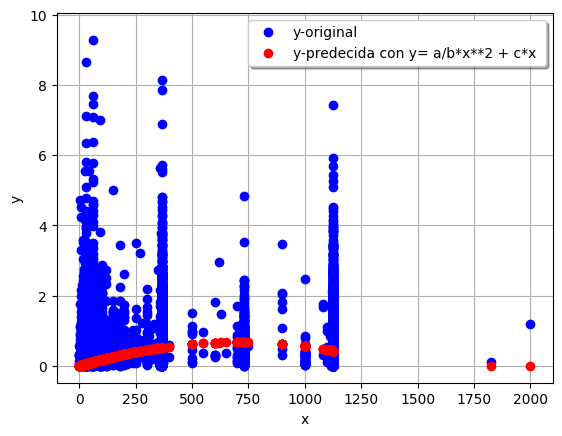

0.18882564437440963
0.4345407280962391


In [58]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['maximum_nights']]
Var_Dep= df['reviews_per_month']
x= Vars_Indep
y= Var_Dep
def func(x, a, b, c):
    return a/b*x**2 + c*x
parametros, covs = curve_fit(func, df['maximum_nights'], df['reviews_per_month'])
y_pred = func(x, *parametros)
y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y= a/b*x**2 + c*x ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R21 = abs(r2_score(y, y_pred))
R1 = np.sqrt(R21)
print(R21)
print(R1)

MODELO 2: FUNCIÓN POLINÓMICA DE GRADO 4

C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\1453608444.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs = curve_fit(func, df['maximum_nights'], df['reviews_per_month'])
C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\1453608444.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\1453608444.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y= 1/a*x**4 ", color= "red")


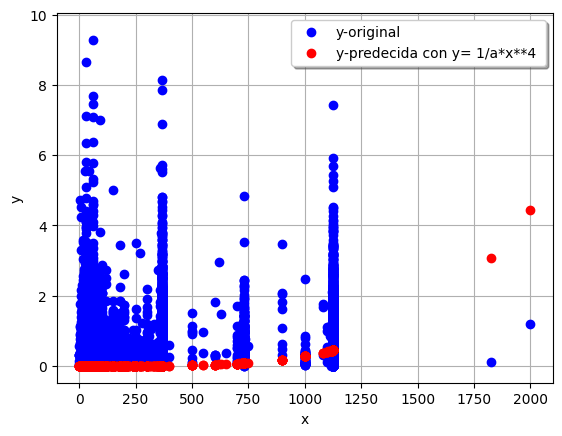

0.5200320975521162
0.7211325103974416


In [59]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['maximum_nights']]
Var_Dep= df['reviews_per_month']
x= Vars_Indep
y= Var_Dep
def func(x, a, b, c):
    return 1/a*x**4
parametros, covs = curve_fit(func, df['maximum_nights'], df['reviews_per_month'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y= 1/a*x**4 ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_REVIEWSPERMONTH = abs(r2_score(y, y_pred))
R_REVIEWSPERMONTH = np.sqrt(R2_REVIEWSPERMONTH)
print(R2_REVIEWSPERMONTH)
print(R_REVIEWSPERMONTH)

In [60]:
resultados = pd.DataFrame({
    "Modelo": ["Reviews per month: Lineal", "Reviews per month: Función Polinomial Inversa", "Reviews per month: Función Polinómica de Grado 4",],
    "R2": [R2, R21, R2_REVIEWSPERMONTH ],
    "Correlación (r)": [R, R1, R_REVIEWSPERMONTH ]
})
resultados

,Modelo,R2,Correlación (r)
0,Reviews per month: Lineal,0.057303,0.239380
1,Reviews per month: Función Polinomial Inversa,0.188826,0.434541
2,Reviews per month: Función Polinómica de Grado 4,0.520032,0.721133


6. PRICE

In [61]:
#CORRELACIÓN LINEAL
R2 = abs(df["reviews_per_month"].corr(df["price"]))
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2)
R

np.float64(0.23487583436659562)

MODELO 1 = FUNCIÓN COCIENTE ENTRE POLINOMIOS DE GRADO 6

C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\2280865060.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\2280865060.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y= (a*x**2 + b)/ c*x**4", color= "red")


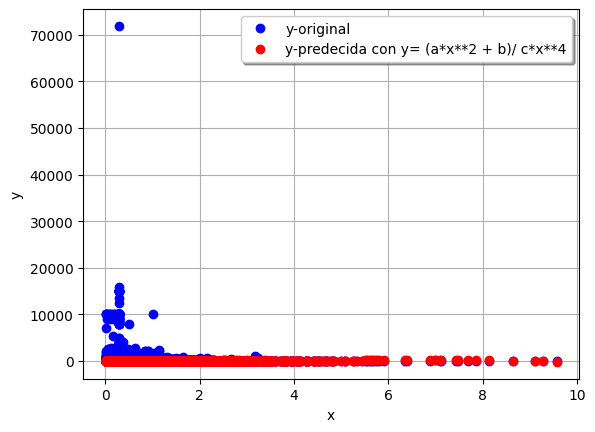

0.06255847100206058
0.2501169146660429


In [62]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['reviews_per_month']]
Var_Dep= df['price']
x= Vars_Indep
y= Var_Dep
def func(x, a, b, c):
    return (a*x**2 + b)/ c*x**4
parametros, covs = curve_fit(func, df['reviews_per_month'], df['price'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y= (a*x**2 + b)/ c*x**4", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R21 = abs(r2_score(y, y_pred))
R1 = np.sqrt(R21)
print(R21)
print(R1)

MODELO 2: FUNCIÓN CUADRÁTICA

C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\292358434.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\sammm\AppData\Local\Temp\ipykernel_15656\292358434.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y= a*x**2 + b*x + c", color= "red")


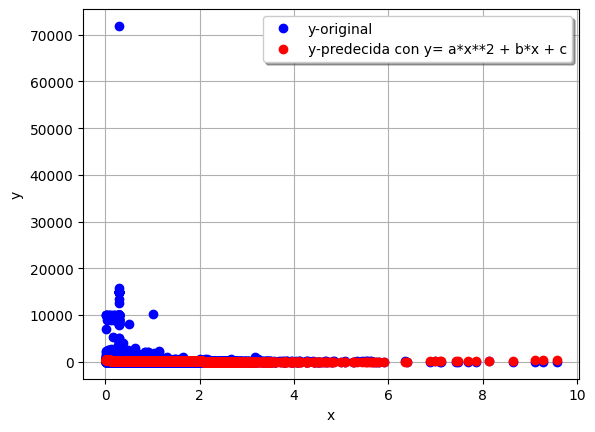

0.003542532314770863
0.059519176025637846


In [67]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['reviews_per_month']]
Var_Dep= df['price']
x= Vars_Indep
y= Var_Dep
def func(x, a, b, c):
    return a*x**2 + b*x + c
parametros, covs = curve_fit(func, df['reviews_per_month'], df['price'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y= a*x**2 + b*x + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_PRICE = abs(r2_score(y, y_pred))
R_PRICE = np.sqrt(R2_PRICE)
print(R2_PRICE)
print(R_PRICE)

In [68]:
resultados = pd.DataFrame({
    "Modelo": ["Price: Lineal", "Price: Función Cociente entre Polinomios Grado 6", "Price: Función Exponencial Decreciente",],
    "R2": [R2, R21, R2_PRICE ],
    "Correlación (r)": [R, R1, R_PRICE ]
})
resultados

,Modelo,R2,Correlación (r)
0,Price: Lineal,0.055167,0.234876
1,Price: Función Cociente entre Polinomios Grado 6,0.062558,0.250117
2,Price: Función Exponencial Decreciente,0.003543,0.059519
